**Import Required Libraries**

- Import TensorFlow and its Keras API to build and train neural network models.

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

**Load IMDB Dataset**

- Loads the IMDB movie reviews dataset, preprocessed with integer-encoded words.
- The dataset is split into training and test sets.

In [25]:
# Load the IMDB dataset (keep the top 10,000 most frequent words)
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

**Pad Sequences**

- Ensures all input sequences are of the same length by padding shorter ones.
- This is necessary for batch processing in deep learning models.

In [26]:
# Pad sequences to the same length
maxlen = 200  # truncate or pad reviews to 200 words
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

**Build Neural Network Model**

- Defines a Sequential model with:
    - An Embedding layer to map word indices into dense vectors
    - A GlobalAveragePooling1D layer for feature reduction
    - Dense layers for classification.


In [27]:
# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),  # Increased units
    Dense(64, activation='relu'),  # Additional Dense layer
    Dense(1, activation='sigmoid')  # sigmoid for binary classification
])

**Compile the Model**

- Sets up the model with the Adam optimizer, binary cross-entropy loss function, and accuracy metric.

In [28]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Train the Model**

- Fits the model to the training data.
- Uses validation split to monitor performance during training.

In [29]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5669 - loss: 0.6914 - val_accuracy: 0.7392 - val_loss: 0.6751
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7443 - loss: 0.6575 - val_accuracy: 0.8068 - val_loss: 0.5639
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8253 - loss: 0.5154 - val_accuracy: 0.8334 - val_loss: 0.4079
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8557 - loss: 0.3659 - val_accuracy: 0.8604 - val_loss: 0.3374
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8852 - loss: 0.2926 - val_accuracy: 0.8740 - val_loss: 0.3138


**Evaluate the Model**

- Tests the trained model on the test dataset to compute final loss and accuracy.

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8667 - loss: 0.3160
Test Loss: 0.3187, Test Accuracy: 0.8654


**Make Predictions**

- Predicts sentiment for test reviews.
- Converts probabilities into binary class predictions (positive or negative).
- Displays first 10 predictions alongside actual labels.

In [31]:
#predictions
# Predict on test data
predictions = model.predict(x_test)

# Convert probabilities to binary output (positive=1, negative=0)
predicted_labels = (predictions > 0.5).astype("int32")

# Show first 10 predictions with their actual labels
for i in range(10):
    print(f"Review {i+1}: Predicted = {predicted_labels[i][0]}, Actual = {y_test[i]}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
Review 1: Predicted = 0, Actual = 0
Review 2: Predicted = 1, Actual = 1
Review 3: Predicted = 1, Actual = 1
Review 4: Predicted = 0, Actual = 0
Review 5: Predicted = 1, Actual = 1
Review 6: Predicted = 0, Actual = 1
Review 7: Predicted = 1, Actual = 1
Review 8: Predicted = 0, Actual = 0
Review 9: Predicted = 1, Actual = 0
Review 10: Predicted = 1, Actual = 1


**Plot Accuracy Curve**

- Visualizes the training and validation accuracy over epochs using matplotlib.

**Plot Loss Curve**

- Visualizes the training and validation loss over epochs using matplotlib.

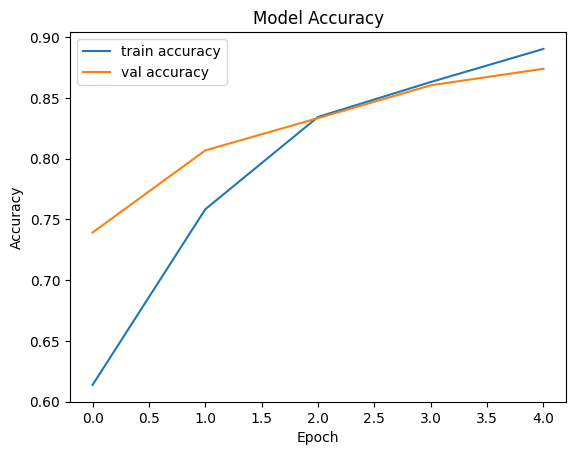

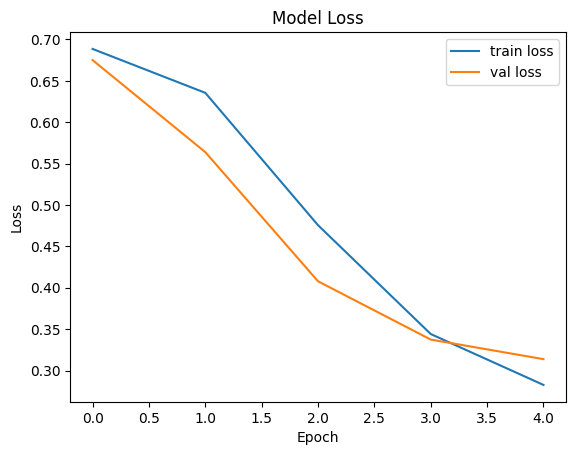

In [32]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()